Classification:(yes or no)


In classification tasks, the goal is to predict the categorical label or class of a given input.
The output variable (also known as the target variable) is discrete and represents a category or class.
Examples of classification tasks include spam email detection (predicting whether an email is spam or not), sentiment analysis (predicting whether a movie review is positive or negative), and medical diagnosis (predicting whether a patient has a particular disease or not).
Common algorithms for classification tasks include logistic regression, decision trees, random forests, support vector machines (SVM), k-nearest neighbors (KNN), and neural networks

Regression:(PREDICTION OR  Guessing)

In regression tasks, the goal is to predict a continuous numerical value based on input features.
The output variable (target variable) is continuous and represents a quantity or a measurement.
Examples of regression tasks include predicting house prices based on features like square footage, number of bedrooms, and location, forecasting stock prices based on historical data, and estimating the temperature based on weather variables.
Common algorithms for regression tasks include linear regression, polynomial regression, decision trees, random forests, support vector regression (SVR), and neural networks.

In [1]:

import os
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("C:\\Users\\vishn\\Desktop\\DataScience\\HEART DISEASE WITH ALG DETAILS\\heart (1).csv")

In [3]:
df.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

As we can see the string data in the dataframe is in the form of object, we need to convert it back to string to work on it

In [5]:
string_col=df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype('string')

In [6]:
df.dtypes

Age                 int64
Sex                string
ChestPainType      string
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         string
MaxHR               int64
ExerciseAngina     string
Oldpeak           float64
ST_Slope           string
HeartDisease        int64
dtype: object

now we can see that all the objets are converted to string

Getting the categorical columns

In [7]:
string_col=df.select_dtypes("string").columns.to_list()

In [8]:
num_col=df.columns.to_list()
#print(num_col)
for col in string_col:
    num_col.remove(col)
num_col.remove("HeartDisease")

In [9]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


**Exploratory Data Analysis**


Correlation Matrix

In [10]:
px.imshow(df.corr(),title="Correlation Plot of the Heat Failure Prediction")


In [11]:
fig=px.histogram(df,
                 x="HeartDisease",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

In [12]:
fig=px.histogram(df,
                 x="ChestPainType",
                 color="Sex",
                 hover_data=df.columns,
                 title="Types of Chest Pain"
                )
fig.show()

In [13]:
fig=px.histogram(df,
                 x="Sex",
                 hover_data=df.columns,
                 title="Sex Ratio in the Data")
fig.show()

In [14]:
fig=px.histogram(df,
                 x="RestingECG",
                 hover_data=df.columns,
                 title="Distribution of Resting ECG")
fig.show()

[]

<Figure size 1500x1000 with 0 Axes>

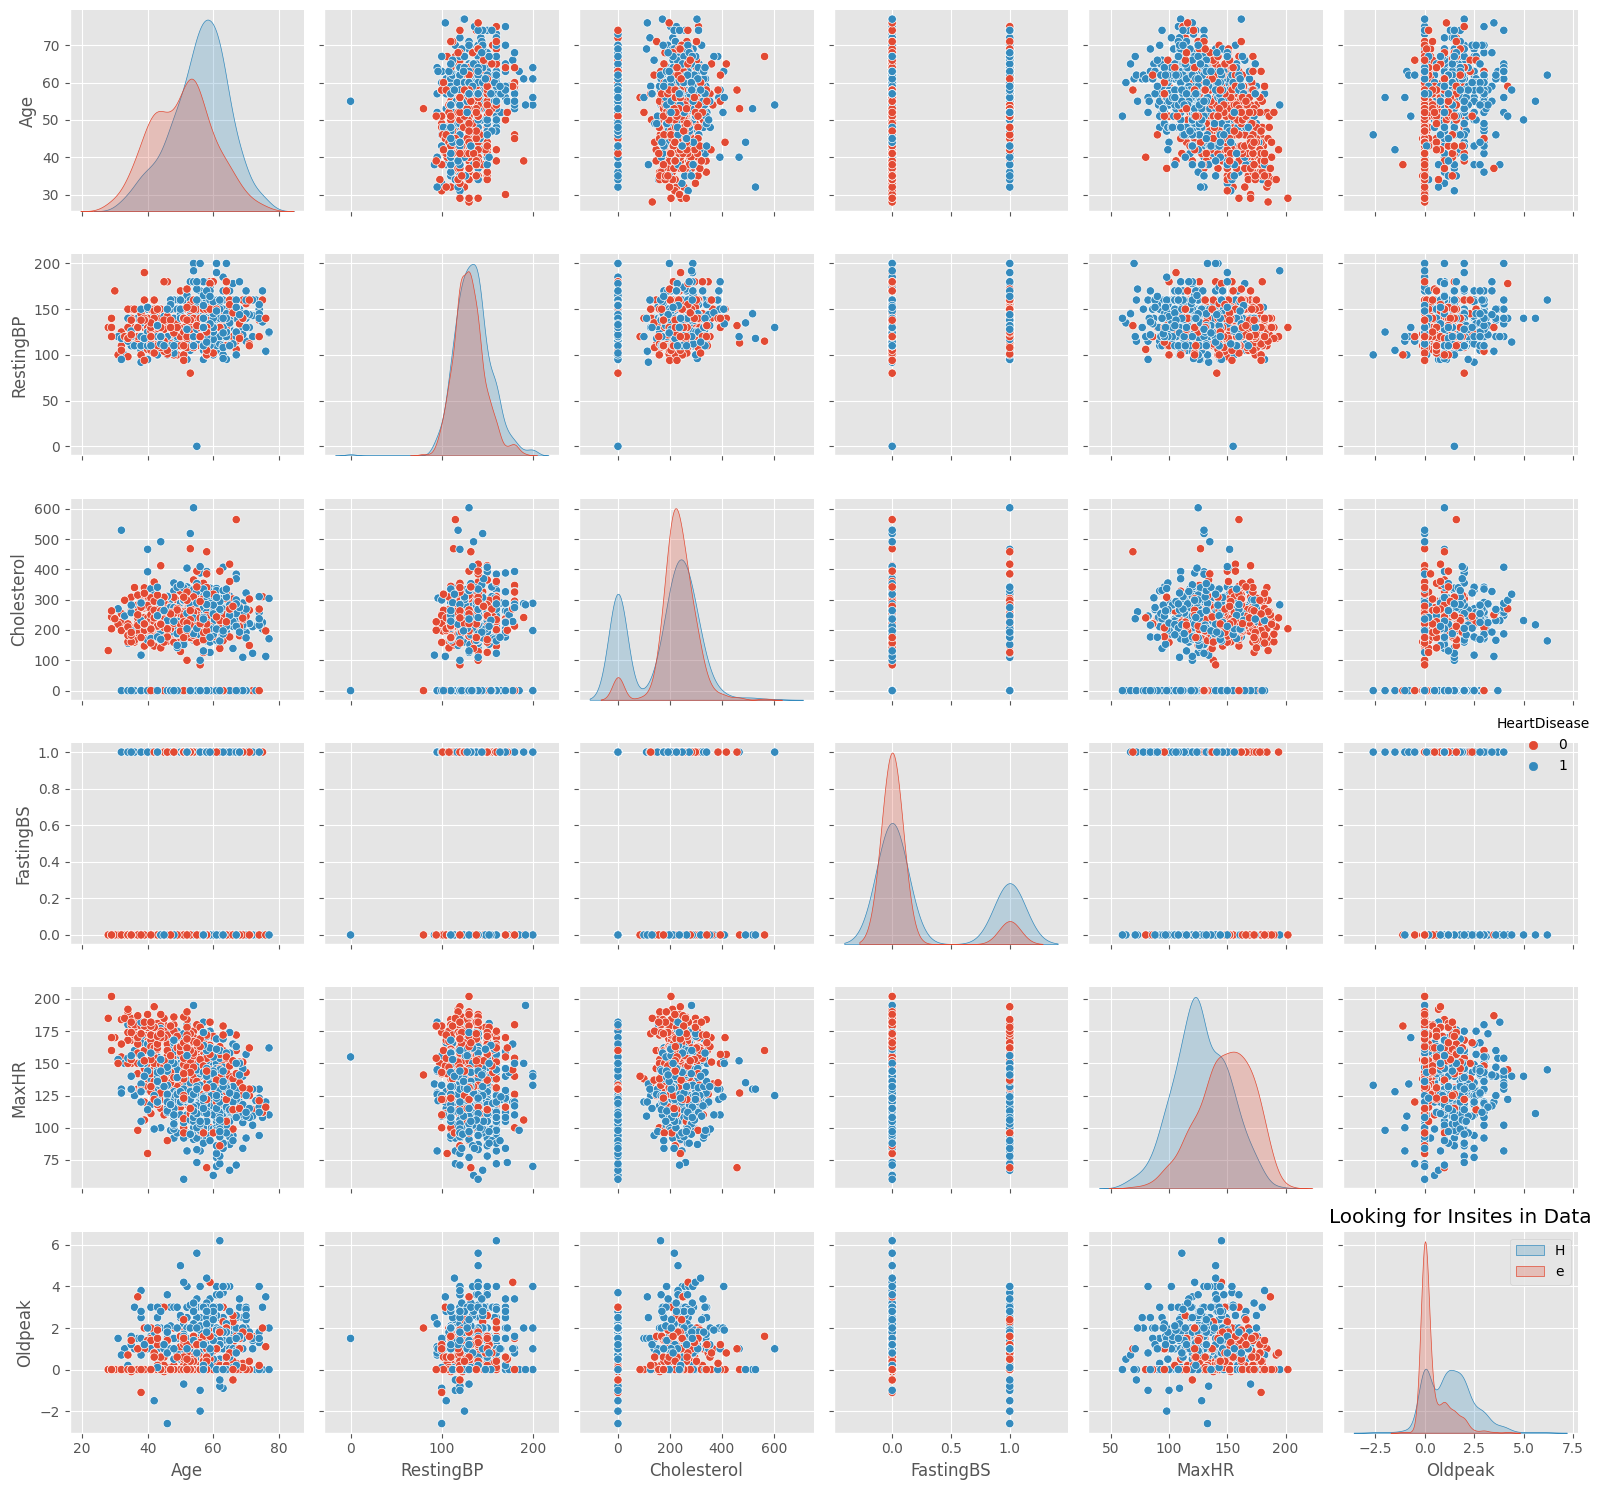

In [15]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()


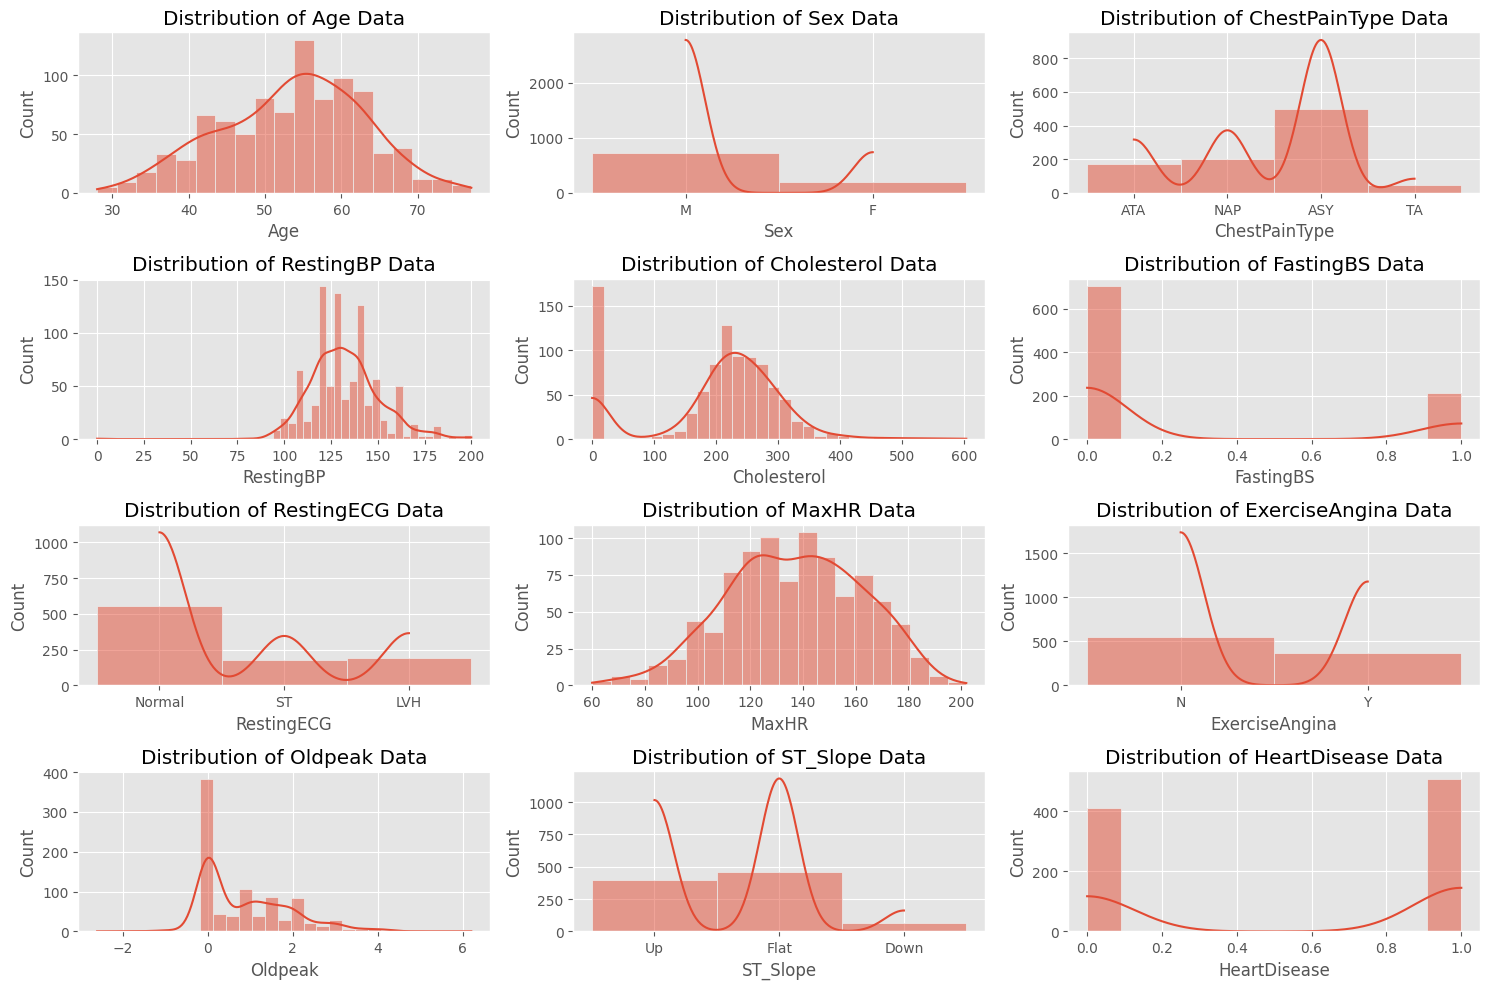

In [16]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

**Outliers**

Identifying outliers in a dataset is important for several reasons:

Data Quality Assurance: Outliers may indicate errors in the data collection process or measurement errors. By identifying and examining outliers, you can ensure the quality and integrity of your dataset.

Model Performance: Outliers can adversely affect the performance of statistical models by skewing the distribution and introducing bias. Removing or appropriately handling outliers can improve the accuracy and reliability of your models.

Understanding the Data: Outliers may contain valuable information about the underlying data distribution, relationships, or anomalies. Exploring outliers can provide insights into rare events, unexpected patterns, or interesting phenomena in the data.

Data Preprocessing: Outliers can affect the results of data preprocessing techniques such as scaling, normalization, or imputation. Addressing outliers as part of the preprocessing steps ensures that subsequent analyses or modeling efforts are based on reliable data.

Minimum: The smallest observation in the dataset, excluding any outliers.

First Quartile (Q1): The value below which 25% of the data fall. It is also known as the lower quartile.

Median (Q2): The middle value of the dataset when it is ordered from least to greatest. It represents the 50th percentile of the data and divides the dataset into two halves.

Third Quartile (Q3): The value below which 75% of the data fall. It is also known as the upper quartile.

Maximum: The largest observation in the dataset, excluding any outliers.

A box plot, also known as a box-and-whisker plot, is a graphical representation of the distribution of quantitative data. It provides a visual summary of the central tendency, dispersion, and skewness of the data, as well as any potential outliers.


In [17]:
fig = px.box(df,y="Age",x="HeartDisease",title=f"Distrubution of Age")
fig.show()


In [18]:
fig = px.box(df,y="RestingBP",x="HeartDisease",title=f"Distrubution of RestingBP",color="Sex")
fig.show()

In [19]:
fig = px.box(df,y="Cholesterol",x="HeartDisease",title=f"Distrubution of Cholesterol")
fig.show()

In [20]:
fig = px.box(df,y="Oldpeak",x="HeartDisease",title=f"Distrubution of Oldpeak")
fig.show()

In [21]:
fig = px.box(df,y="MaxHR",x="HeartDisease",title=f"Distrubution of MaxHR")
fig.show()

**Data Preprocessing**

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    string 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    string 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    string 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    string 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), string(5)
memory usage: 86.2 KB


In [23]:
# Checking for NULLs in the data
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

**Feature Scaling**

Why Should we Use Feature Scaling?
The first question we need to address – why do we need to scale the variables in our dataset? Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. 
Feature scaling, also known as data normalization or standardization, is a preprocessing technique used in machine learning to standardize the range of independent variables or features in the data. The goal of feature scaling is to bring all features to the same scale or range, which helps improve the performance of certain machine learning algorithms.


**Distance-Based Algorithms** (e.g., K-Nearest Neighbors, K-Means, Support Vector Machines with kernel functions):



Distance-Based Algorithms: They look at how far apart data points are from each other. For example, if two things are similar in many ways, they'll be closer in the data space. Algorithms like KNN use this idea to make predictions.ex:KNN,k-means clusternig,svm



**Tree-based algorithms**e.g., Decision Trees, Random Forests, Gradient Boosting Machines

Tree-Based Algorithms: tree-Based Algorithms involve recursively partitioning the feature space into segments or groups based on the values of features. (Imagine you have a dataset with different features (like age, height, weight, etc.). Tree-based algorithms start by looking at one feature at a time and finding the best way to split the data based on that feature)    


example of  distance-based (K-Nearest Neighbors)

![Screenshot 2024-02-26 193136.png](<attachment:Screenshot 2024-02-26 193136.png>)
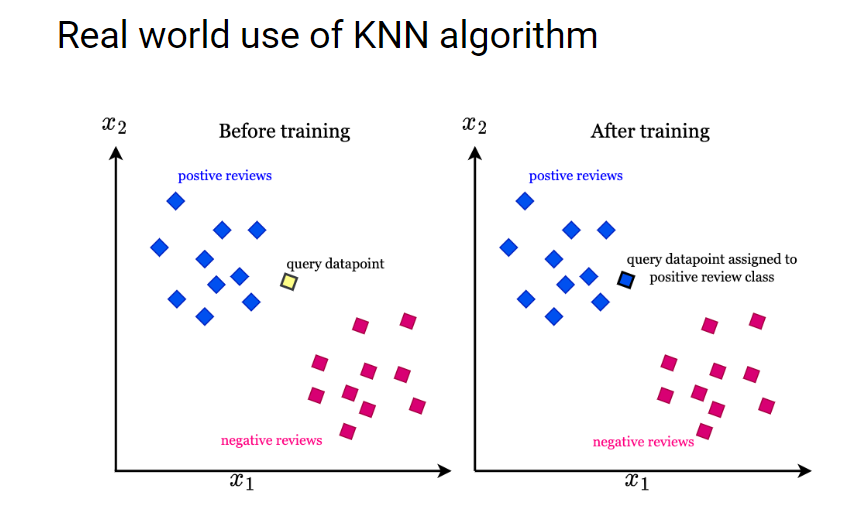

In [24]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [25]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train

array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [6.4, 3.2, 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [5.4, 3.9, 1.3, 0.4],
       [5.4, 3.7, 1.5, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [7.2, 3.6, 6.1, 2.5],
       [5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2

In [28]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [29]:
# Distance-Based Algorithm: K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


In [30]:
y_pred_knn 

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [31]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of K-Nearest Neighbors:", accuracy_knn)

Accuracy of K-Nearest Neighbors: 1.0


example tree-based using Decision Tree


In [32]:
# Tree-Based Algorithm: Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)


In [33]:
print("Accuracy of Decision Tree:", accuracy_dt)

Accuracy of Decision Tree: 1.0


Both KNN and Decision Tree are used to classify iris flowers into different species based on their features. KNN makes predictions based on the similarity of feature vectors, while Decision Tree makes predictions by recursively partitioning the feature space into segments((Imagine you have a dataset with different features (like age, height, weight, etc.). Tree-based algorithms start by looking at one feature at a time and finding the best way to split the data based on that feature)    
)

# **differences between normalization and standardization:**

Normalization (Min-Max Scaling):

Example: Consider a dataset containing information about houses, including features like 'House Area' (in square feet) and 'House Price' (in dollars). The 'House Area' feature ranges from 500 square feet to 3000 square feet, and the 'House Price' feature ranges from $100,000 to $1,000,000.
Normalization: We can normalize both features using Min-Max scaling to scale them to a range between 0 and 1. For example, after normalization, a house with an area of 1500 square feet might have a normalized value of 0.4, and a house with a price of $500,000 might have a normalized value of 0.5. This allows us to compare the features on the same scale, making them directly comparable.

Standardization (Z-score Normalization):

Example: Consider a dataset containing information about students' exam scores, including features like 'Math Score' and 'English Score'. The 'Math Score' feature has a mean of 75 and a standard deviation of 10, while the 'English Score' feature has a mean of 65 and a standard deviation of 5.
Standardization: We can standardize both features using Z-score normalization to have a mean of 0 and a standard deviation of 1. For example, after standardization, a student with a math score of 80 might have a standardized score of 0.5, and a student with an English score of 70 might have a standardized score of 1. This allows us to compare the features in terms of their deviation from the mean, regardless of the original scale.

**The Big Question – Normalize or Standardize?**

Normalization:Think of normalization like squeezing all your data into a specific range, usually between 0 and 1.
It's handy when your data doesn't follow a nice, neat bell-shaped curve (Gaussian distribution).
For example, if you have test scores ranging from 0 to 100, normalization makes all the scores fit between 0 and 1. This is useful for algorithms like K-Nearest Neighbors and Neural Networks because they don't assume any specific shape or distribution of the data.

Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.


**Robust Scaler**

The RobustScaler is a technique used for feature scaling in machine learning and data preprocessing. It is particularly useful when dealing with datasets that contain outliers.
while RobustScaler is a form of scaling, it operates differently from traditional normalization and standardization methods.



**we are going to analyze data with everscaling robust , min-max,standard scalling**


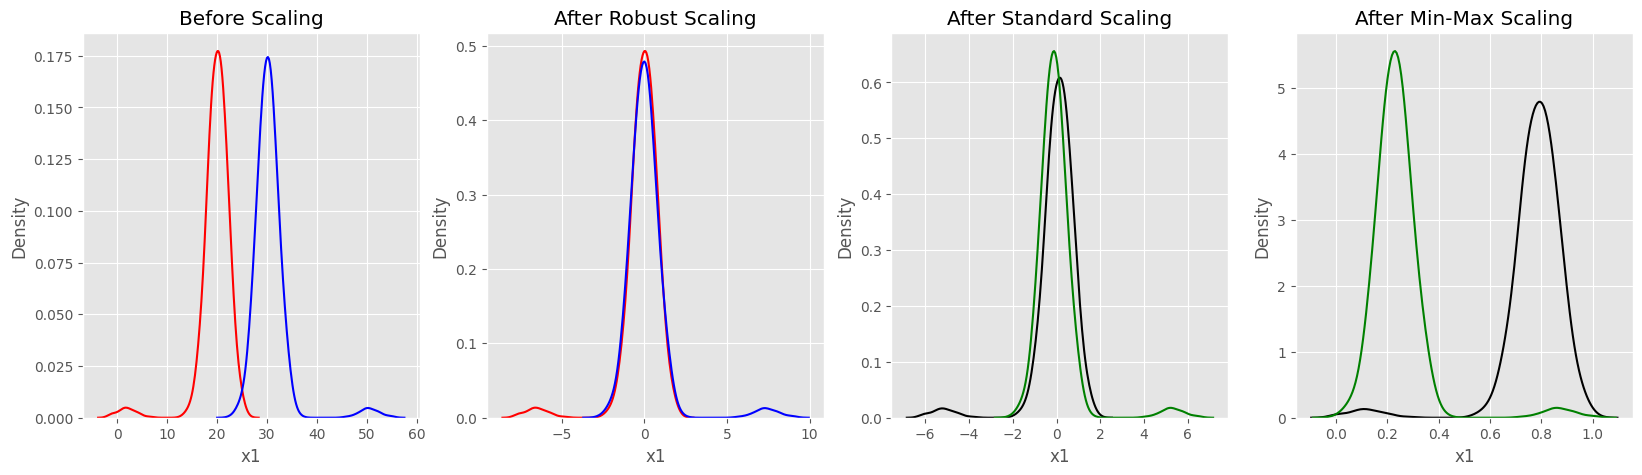

In [34]:
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')

sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')

sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')

sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')

sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()

**from the visualizatioin we can see that robust scaling is more good **
note:the provided code is an example of checking different scaling methods to determine the most suitable scaling approach for the given dataset

Handling Categorical Variables

Categorical variables/features are any feature type can be classified into two major types:

Nominal
Ordinal

Nominal variables are variables that have two or more categories which do not have any kind of order associated with them. For example, if gender is classified into two groups, i.e. male and female, it can be considered as a nominal variable.

Ordinal variables, on the other hand, have “levels” or categories with a particular order associated with them. For example, an ordinal categorical variable can be a feature with three different levels: low, medium and high. Order is important.

    It is a binary classification problem(such as "Yes" or "No", "True" or "False", or "Positive" or "Negative".): the target here is not skewed but we use the best metric for this binary classification problem which would be Area Under the ROC Curve (AUC). We can use precision and recall too, but AUC combines these two metrics. Thus, we will be using AUC to evaluate the model that we build on this dataset

    AUC:AUC is a widely used metric for binary classification problems because of its robustness, comprehensiveness, threshold agnosticism, interpretability, and focus on discrimination.
    both AUC and Precision and Recall metrics are important for evaluating binary classification models, they serve different purposes and provide complementary insights into the model's performance.

We have to know that computers do not understand text data and thus, we need to convert these categories to numbers. A simple way of doing that can be to use 

In [35]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
#One Hot Encoding
data=['apple','orange','carrot','grapes','pumpkin','apple','orange','orange','grapes']
pd.get_dummies(data)

,apple,carrot,grapes,orange,pumpkin
0,1,0,0,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,0,0,1
5,1,0,0,0,0
6,0,0,0,1,0
7,0,0,0,1,0
8,0,0,1,0,0


but we need to understand where to use which type of label encoding:
there is two types of label encoding
such as 
*Ordinal Label Encoding:
*One-Hot Encoding

For not Tree based Machine Learning Algorithms the best way to go will be to use One-Hot Encoding

For Tree based Machine Learning Algorithms the best way to go is with Label Encoding

In [36]:
df[string_col].head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [37]:
for col in string_col:
    print(f"The distribution of categorical valeus in the {col} is : ")
    print(df[col].value_counts())

The distribution of categorical valeus in the Sex is : 
M    725
F    193
Name: Sex, dtype: Int64
The distribution of categorical valeus in the ChestPainType is : 
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: Int64
The distribution of categorical valeus in the RestingECG is : 
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: Int64
The distribution of categorical valeus in the ExerciseAngina is : 
N    547
Y    371
Name: ExerciseAngina, dtype: Int64
The distribution of categorical valeus in the ST_Slope is : 
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: Int64


By understanding the distribution of values within categorical variables, you can make informed decisions about data preprocessing, feature engineering, and model selection in your analysis or machine learning tasks.

As we will be using both types of approches for demonstration lets do First Label Ecoding 
which will be used with Tree Based Algorthms

In [38]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [39]:
df_tree=df.apply(LabelEncoder().fit_transform)#After applying fit_transform(), the DataFrame df_tree will contain the transformed numerical data, where categorical labels are replaced with their respective integer representations based on the learned mapping from the LabelEncoder() object.
df_tree.head(15)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0
5,11,1,2,22,189,0,1,96,0,10,2,0
6,17,0,1,31,95,0,1,96,0,10,2,0
7,26,1,1,14,66,0,1,68,0,10,2,0
8,9,1,0,41,65,0,1,56,1,25,1,1
9,20,0,1,22,142,0,1,46,0,10,2,0


We can use this directly in many tree-based models:

Decision trees
Random forest
Extra Trees
Or any kind of boosted trees model
XGBoost
GBM
LightGBM
This type of encoding cannot be used in linear models, support vector machines or neural networks as they expect data to be normalized (or standardized). For these types of models, we can binarize the data. As shown bellow :



Creaeting one hot encoded features for working with non tree based algorithms 

In [40]:
#example program of OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Sample categorical data
datas = {'color': ['red', 'green', 'blue', 'green', 'red']}

# Create DataFrame from the sample data
dfs = pd.DataFrame(datas)

# Initialize OneHotEncoder
encoders = OneHotEncoder()

# Perform one-hot encoding
encoded_datas = encoders.fit_transform(dfs[['color']]).toarray()

# Convert encoded data into DataFrame
encoded_dfs = pd.DataFrame(encoded_datas, columns=encoders.get_feature_names_out(['color']))

# Concatenate the original DataFrame with the encoded DataFrame
result_dfs = pd.concat([dfs, encoded_dfs], axis=1)

print("Original DataFrame:")
print(dfs)
print("\nOne-Hot Encoded DataFrame:")
print(result_dfs)

Original DataFrame:
   color
0    red
1  green
2   blue
3  green
4    red

One-Hot Encoded DataFrame:
   color  color_blue  color_green  color_red
0    red         0.0          0.0        1.0
1  green         0.0          1.0        0.0
2   blue         1.0          0.0        0.0
3  green         0.0          1.0        0.0
4    red         0.0          0.0        1.0


In [41]:
df_nontree=pd.get_dummies(df,columns=string_col,drop_first=False)
df_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [42]:
# Getting the target column at the end
target="HeartDisease"
y=df_nontree[target].values
df_nontree.drop("HeartDisease",axis=1,inplace=True)
df_nontree=pd.concat([df_nontree,df[target]],axis=1)
df_nontree.head()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
1,49,160,180,0,156,1.0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,37,130,283,0,98,0.0,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
3,48,138,214,0,108,1.5,1,0,1,0,...,0,0,1,0,0,1,0,1,0,1
4,54,150,195,0,122,0.0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0


**Chossing the right Cross-Validation**

 cross-validation plays a crucial role in evaluating, optimizing, and selecting the best-performing model for the given dataset, ultimately leading to better performance on unseen data.
 cross-validation itself does not directly improve the accuracy of the model,

There are several types of cross-validation techniques, each with its own advantages and considerations. Here are some common types:

Holdout Validation: This is the simplest form of cross-validation, where the dataset is split into a training set and a validation set. The model is trained on the training set and evaluated on the validation set. However, this approach may lead to high variance in the performance estimate, especially with small datasets.

K-Fold Cross-Validation: In k-fold cross-validation, the dataset is divided into k equal-sized folds. The model is trained k times, each time using k-1 folds for training and the remaining fold for validation. The performance metrics are then averaged across the k iterations. This approach provides a more reliable estimate of the model's performance compared to holdout validation.

Stratified K-Fold Cross-Validation: This variation of k-fold cross-validation ensures that each fold preserves the percentage of samples for each class, making it suitable for imbalanced datasets. It helps prevent bias in the performance estimates, especially when dealing with unequal class distributions.

Leave-One-Out Cross-Validation (LOOCV): In LOOCV, each data point is used as the validation set once, while the rest of the data is used for training. This process is repeated for every data point in the dataset. LOOCV provides a low bias estimate of the model's performance but can be computationally expensive, especially for large datasets.

Repeated K-Fold Cross-Validation: Repeated k-fold cross-validation involves repeating the k-fold cross-validation process multiple times with different random splits of the data. This helps reduce the variance in the performance estimate and provides a more robust evaluation of the model.

Nested Cross-Validation: Nested cross-validation is used for model selection and hyperparameter tuning. It involves performing cross-validation inside an outer loop for model evaluation and an inner loop for hyperparameter tuning. This approach helps prevent overfitting of hyperparameters to the validation set.


Cross-validation techniques are primarily used during the model training phase in machine learning. They help assess the performance and generalization ability of the model during the training process

During model training, cross-validation techniques partition the dataset into multiple subsets, known as folds. These folds are used iteratively to train and evaluate the model. By repeatedly training the model on different subsets of the data and evaluating its performance, cross-validation provides a more robust estimate of how well the model will generalize to unseen data compared to a single train-test split.

**cross-validation itself does not directly improve the accuracy of the model, it plays a crucial role in evaluating, optimizing, and selecting the best-performing model for the given dataset, ultimately leading to better performance on unseen data.**

**example code**

In [43]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Load the Iris dataset
iris = load_iris()
Xx = iris.data
yy = iris.target

# Initialize the logistic regression model
modelll = LogisticRegression()

# Perform cross-validation with 5 folds
# Here, we are using accuracy as the scoring metric
scoresss = cross_val_score(modelll, Xx, yy, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scoresss)

# Calculate and print the mean and standard deviation of the scores
print("Mean accuracy:", scoresss.mean())
print("Standard deviation of accuracy:", scoresss.std())


Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean accuracy: 0.9733333333333334
Standard deviation of accuracy: 0.02494438257849294


**example code for StratifiedGroupKFold**

In [44]:
from sklearn.model_selection import StratifiedGroupKFold
import numpy as np

# Example data
Xs = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]])
ys = np.array([0, 1, 1, 0, 1, 0])  # Binary target variable
groupss = np.array([1, 1, 2, 2, 3, 3])  # Grouping information
print("independed",Xs)
print('taget',ys)
print('groups',groupss)


independed [[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]
taget [0 1 1 0 1 0]
groups [1 1 2 2 3 3]


In [45]:
# Define the StratifiedGroupKFold object
sgkf = StratifiedGroupKFold(n_splits=3)

# Iterate over the splits
for train_index, test_index in sgkf.split(Xs, ys, groupss):
    print("TRAIN:", train_index, "TEST:", test_index)
    Xtrain, Xtest = Xs[train_index], Xs[test_index]
    ytrain, ytest = ys[train_index], ys[test_index]
    groups_train, groups_test = groupss[train_index], groupss[test_index]
    print("Groups in Train Set:", np.unique(groups_train))
    print("Groups in Test Set:", np.unique(groups_test))
    print()


TRAIN: [2 3 4 5] TEST: [0 1]
Groups in Train Set: [2 3]
Groups in Test Set: [1]

TRAIN: [0 1 4 5] TEST: [2 3]
Groups in Train Set: [1 3]
Groups in Test Set: [2]

TRAIN: [0 1 2 3] TEST: [4 5]
Groups in Train Set: [1 2]
Groups in Test Set: [3]



**Training our Machine Learning Model :**

**Using NON-TREE BASED ALGORITHMS**

**1.Using Logistic Regression :**

Logistic regression is a calculation used to predict a binary outcome: either something happens, or does not. This can be exhibited as Yes/No, Pass/Fail, Alive/Dead, etc.

Independent variables are analyzed to determine the binary outcome with the results falling into one of two categories. The independent variables can be categorical or numeric, but the dependent variable(target variable) is always categorical. Written like this:

In [46]:
feature_col_nontree=df_nontree.columns.to_list()
feature_col_nontree

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'Sex_F',
 'Sex_M',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_LVH',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_N',
 'ExerciseAngina_Y',
 'ST_Slope_Down',
 'ST_Slope_Flat',
 'ST_Slope_Up',
 'HeartDisease']

In [47]:
feature_col_nontree.remove(target)#removeing HeartDisease which is target varible
feature_col_nontree

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'Sex_F',
 'Sex_M',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_LVH',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_N',
 'ExerciseAngina_Y',
 'ST_Slope_Down',
 'ST_Slope_Flat',
 'ST_Slope_Up']

In [48]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

#x_train and y_train is for model training like( logistic regression) and x_valid and y_valid is for cross validation 
acc_log = []

kf = model_selection.StratifiedKFold(n_splits=5)

for fold, (trn_, val_) in enumerate(kf.split(X=df_nontree, y=y)):
    
    X_train = df_nontree.loc[trn_, feature_col_nontree]
    y_train = y[trn_]
    print("X_train",'\n',X_train.head(10))

    X_valid = df_nontree.loc[val_, feature_col_nontree]
    y_valid = y[val_]
    print('X_valid','\n',X_valid.head(10))
    
    ro_scaler = MinMaxScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)
    
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_valid)
    print("predicting",y_pred)
    
    print(f"The fold is : {fold} : ")
    
    print('classification_report','\n',classification_report(y_valid, y_pred))
    
    acc = roc_auc_score(y_valid, y_pred)#ROC AUC (Receiver Operating Characteristic Area Under the Curve) score, which is a performance metric commonly used for evaluating the quality of binary classification models.
    acc_log.append(acc)
    print(f"The accuracy for Fold {fold+1} : {acc}")
    
print(f"Mean ROC AUC Score: {np.mean(acc_log)}")


X_train 
      Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_F  Sex_M  \
128   54        120          230          1    140      0.0      1      0   
129   42        120          228          0    152      1.5      0      1   
130   38        145          292          0    130      0.0      0      1   
134   61        130          294          0    120      1.0      1      0   
136   43        120          215          0    175      0.0      1      0   
137   39        120          241          0    146      2.0      0      1   
143   53        140          243          0    155      0.0      0      1   
145   39        110          273          0    132      0.0      0      1   
146   42        120          198          0    155      0.0      0      1   
147   43        120          249          0    176      0.0      1      0   

     ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
128                  0                  1                  0   
129           

In a typical machine learning workflow, the data is split into training and validation sets. The training set (X_train, y_train) is used to train the model, and the validation set (X_valid, y_valid) is used to evaluate the model's performance.

Here's how the variables are typically used:

X_train: Independent variables (features) for the training set.
y_train: Dependent variable (target) for the training set.
X_valid: Independent variables (features) for the validation set.
y_valid: Dependent variable (target) for the validation set.
In the provided code:

X_train and y_train are indeed used to train the logistic regression model.
X_valid and y_valid are used to validate the model's performance using cross-validation.
The predict method is applied on X_valid, which represents the features of the validation set. The model predicts the target variable based on these features (X_valid). Then, the predicted values (y_pred) are compared with the actual target values (y_valid) to evaluate the model's performance using metrics like ROC AUC score and classification report.

**Using Naive Bayers**

Naive Bayes is indeed a machine learning algorithm used for classification tasks, similar to logistic regression, linear regression, KNN, and others. However, it is different in terms of its underlying principles and assumptions.

Naive Bayes is a probabilistic machine learning algorithm based on Bayes' theorem, which describes the probability of an event based on prior knowledge of conditions related to the event. Naive Bayes is particularly popular for text classification tasks, such as spam detection and document categorization, but it can also be applied to a wide range of other classification problems.

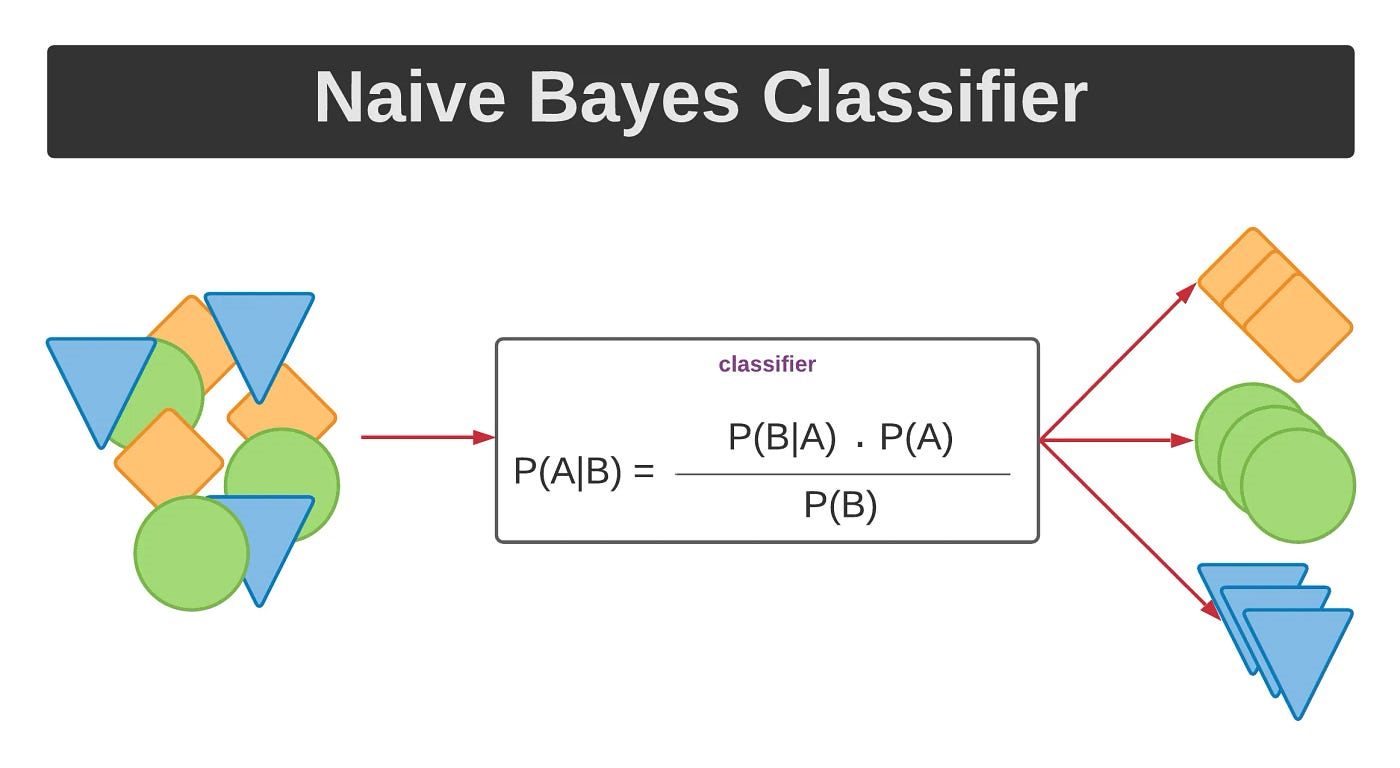

**Small explantion of  Countvectorizer and example code of Naives bayers**

CountVectorizer: is a feature extraction technique commonly used in text processing tasks, particularly for building machine learning models for text classification. So ofc there is a question that came "why dont we use Encoding instead of countvectorizer" the answer  for that is While it's technically possible to use encoding techniques like one-hot encoding or label encoding for text data, they're generally not suitable for natural language processing (NLP) tasks like text classification . 

It converts a collection of text documents into a matrix of token counts, where each row represents a document, and each column represents a unique word in the corpus. The value in each cell indicates the frequency of the word's occurrence in the corresponding document.

Here's why: Loss of Information,High Dimensionality,Lack of Contextual Information,Inability to Handle New Words


from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the 20 Newsgroups dataset
news_data = fetch_20newsgroups()

# Split the dataset into training and testing sets
news_X_train, news_X_test, news_y_train, news_y_test = train_test_split(news_data.data, news_data.target, test_size=0.25, random_state=42)

# Create a pipeline with CountVectorizer for feature extraction and GaussianNB for classification
text_classification_model = make_pipeline(CountVectorizer(), GaussianNB())

# Train the model
text_classification_model.fit(news_X_train, news_y_train)

# Predict the labels for the test set
predicted_labels = text_classification_model.predict(news_X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(news_y_test, predicted_labels)
print("Accuracy:", accuracy)

# Generate a classification report
classification_report = metrics.classification_report(news_y_test, predicted_labels, target_names=news_data.target_names)
print(classification_report)

Using Naive Bayers

In [49]:
from sklearn.naive_bayes import GaussianNB
#x_train and y_train is for model training like( logistic regression) and x_valid and y_valid is for cross validation 
acc_log = []

kf = model_selection.StratifiedKFold(n_splits=5)

for fold, (trn_, val_) in enumerate(kf.split(X=df_nontree, y=y)):
    
    X_train = df_nontree.loc[trn_, feature_col_nontree]
    y_train = y[trn_]
    print("X_train",'\n',X_train.head(10))

    X_valid = df_nontree.loc[val_, feature_col_nontree]
    y_valid = y[val_]
    print('X_valid','\n',X_valid.head(10))
    
    ro_scaler = MinMaxScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)
    
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_valid)
    print("predicting",y_pred)
    
    print(f"The fold is : {fold} : ")
    
    print('classification_report','\n',classification_report(y_valid, y_pred))
    
    acc = roc_auc_score(y_valid, y_pred)#ROC AUC (Receiver Operating Characteristic Area Under the Curve) score, which is a performance metric commonly used for evaluating the quality of binary classification models.
    acc_log.append(acc)
    print(f"The accuracy for Fold {fold+1} : {acc}")
    
print(f"Mean ROC AUC Score: {np.mean(acc_log)}")


X_train 
      Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_F  Sex_M  \
128   54        120          230          1    140      0.0      1      0   
129   42        120          228          0    152      1.5      0      1   
130   38        145          292          0    130      0.0      0      1   
134   61        130          294          0    120      1.0      1      0   
136   43        120          215          0    175      0.0      1      0   
137   39        120          241          0    146      2.0      0      1   
143   53        140          243          0    155      0.0      0      1   
145   39        110          273          0    132      0.0      0      1   
146   42        120          198          0    155      0.0      0      1   
147   43        120          249          0    176      0.0      1      0   

     ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
128                  0                  1                  0   
129           

**Using SVM(Support Vector Machines)**

Support Vector Machines (SVM) is a type of machine learning algorithm used for classification tasks
Imagine you have a bunch of dots on a piece of paper, and you want to draw a line that separates them into two groups. SVM helps you find the best possible line (or sometimes a curved surface in higher dimensions) that separates these dots into their respective groups
SVM looks for the line that maximizes the distance between the closest dots from each group. These closest dots are called support vectors. By maximizing this distance, SVM ensures that the line can better classify new, unseen dots correctly.

Support Vector Machines (SVM) are commonly used for prediction tasks, particularly in classification problems where the goal is to predict the class label of a given data point. SVM is well-suited for prediction tasks in various fields



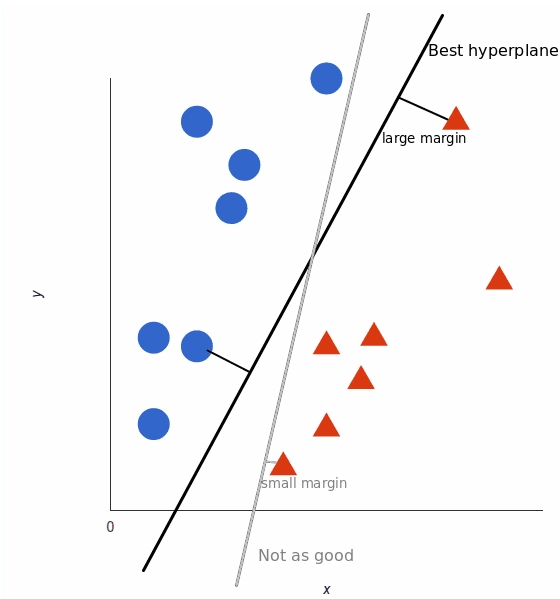

after finding the best separating hyperplane, SVM uses it to classify and predict the class labels of new data points based on their positions relative to the hyperplane. This process allows SVM to make predictions on unseen data with high accuracy, making it a powerful tool for classification tasks.

we are using SVC , Support Vector Classification (SVC) is a type of Support Vector Machine (SVM) algorithm used for classification tasks. In simple terms, SVC is a variant of SVM tailored specifically for classification problems, where the goal is to predict the categorical class label of input data points.

We need to choose the best Kernel according to our need:

The linear kernel: is mostly preferred for text classification problems as it performs well for large datasets.
Gaussian kernels: tend to give good results when there is no additional information regarding data that is not available.
Rbf kernel: is also a kind of Gaussian kernel which projects the high dimensional data and then searches a linear separation for it.
Polynomial kernels: give good results for problems where all the training data is normalized


Using linerar kernal 

In [50]:
from sklearn.svm import SVC
#x_train and y_train is for model training like( logistic regression) and x_valid and y_valid is for cross validation 
acc_log = []

kf = model_selection.StratifiedKFold(n_splits=5)

for fold, (trn_, val_) in enumerate(kf.split(X=df_nontree, y=y)):
    
    X_train = df_nontree.loc[trn_, feature_col_nontree]
    y_train = y[trn_]
    print("X_train",'\n',X_train.head(10))

    X_valid = df_nontree.loc[val_, feature_col_nontree]
    y_valid = y[val_]
    print('X_valid','\n',X_valid.head(10))
    
    ro_scaler = MinMaxScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)
    
    clf = SVC(kernel='linear')
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_valid)
    print("predicting",y_pred)
    
    print(f"The fold is : {fold} : ")
    
    print('classification_report','\n',classification_report(y_valid, y_pred))
    
    acc = roc_auc_score(y_valid, y_pred)#ROC AUC (Receiver Operating Characteristic Area Under the Curve) score, which is a performance metric commonly used for evaluating the quality of binary classification models.
    acc_log.append(acc)
    print(f"The accuracy for Fold {fold+1} : {acc}")
    
print(f"Mean ROC AUC Score: {np.mean(acc_log)}")

X_train 
      Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_F  Sex_M  \
128   54        120          230          1    140      0.0      1      0   
129   42        120          228          0    152      1.5      0      1   
130   38        145          292          0    130      0.0      0      1   
134   61        130          294          0    120      1.0      1      0   
136   43        120          215          0    175      0.0      1      0   
137   39        120          241          0    146      2.0      0      1   
143   53        140          243          0    155      0.0      0      1   
145   39        110          273          0    132      0.0      0      1   
146   42        120          198          0    155      0.0      0      1   
147   43        120          249          0    176      0.0      1      0   

     ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
128                  0                  1                  0   
129           

Using Sigmoid Kernel

In [51]:
from sklearn.svm import SVC
#x_train and y_train is for model training like( logistic regression) and x_valid and y_valid is for cross validation 
acc_log = []

kf = model_selection.StratifiedKFold(n_splits=5)

for fold, (trn_, val_) in enumerate(kf.split(X=df_nontree, y=y)):
    
    X_train = df_nontree.loc[trn_, feature_col_nontree]
    y_train = y[trn_]
    print("X_train",'\n',X_train.head(10))

    X_valid = df_nontree.loc[val_, feature_col_nontree]
    y_valid = y[val_]
    print('X_valid','\n',X_valid.head(10))
    
    ro_scaler = MinMaxScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)
    
    clf = SVC(kernel='sigmoid')
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_valid)
    print("predicting",y_pred)
    
    print(f"The fold is : {fold} : ")
    
    print('classification_report','\n',classification_report(y_valid, y_pred))
    
    acc = roc_auc_score(y_valid, y_pred)#ROC AUC (Receiver Operating Characteristic Area Under the Curve) score, which is a performance metric commonly used for evaluating the quality of binary classification models.
    acc_log.append(acc)
    print(f"The accuracy for Fold {fold+1} : {acc}")
    
print(f"Mean ROC AUC Score: {np.mean(acc_log)}")

X_train 
      Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_F  Sex_M  \
128   54        120          230          1    140      0.0      1      0   
129   42        120          228          0    152      1.5      0      1   
130   38        145          292          0    130      0.0      0      1   
134   61        130          294          0    120      1.0      1      0   
136   43        120          215          0    175      0.0      1      0   
137   39        120          241          0    146      2.0      0      1   
143   53        140          243          0    155      0.0      0      1   
145   39        110          273          0    132      0.0      0      1   
146   42        120          198          0    155      0.0      0      1   
147   43        120          249          0    176      0.0      1      0   

     ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
128                  0                  1                  0   
129           

Using RBF kernel

In [52]:
from sklearn.svm import SVC
#x_train and y_train is for model training like( logistic regression) and x_valid and y_valid is for cross validation 
acc_log = []

kf = model_selection.StratifiedKFold(n_splits=5)

for fold, (trn_, val_) in enumerate(kf.split(X=df_nontree, y=y)):
    
    X_train = df_nontree.loc[trn_, feature_col_nontree]
    y_train = y[trn_]
    print("X_train",'\n',X_train.head(10))

    X_valid = df_nontree.loc[val_, feature_col_nontree]
    y_valid = y[val_]
    print('X_valid','\n',X_valid.head(10))
    
    ro_scaler = MinMaxScaler()
    X_train = ro_scaler.fit_transform(X_train)
    X_valid = ro_scaler.transform(X_valid)
    
    clf = SVC(kernel='rbf')
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_valid)
    print("predicting",y_pred)
    
    print(f"The fold is : {fold} : ")
    
    print('classification_report','\n',classification_report(y_valid, y_pred))
    
    acc = roc_auc_score(y_valid, y_pred)#ROC AUC (Receiver Operating Characteristic Area Under the Curve) score, which is a performance metric commonly used for evaluating the quality of binary classification models.
    acc_log.append(acc)
    print(f"The accuracy for Fold {fold+1} : {acc}")
    
print(f"Mean ROC AUC Score: {np.mean(acc_log)}")

X_train 
      Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_F  Sex_M  \
128   54        120          230          1    140      0.0      1      0   
129   42        120          228          0    152      1.5      0      1   
130   38        145          292          0    130      0.0      0      1   
134   61        130          294          0    120      1.0      1      0   
136   43        120          215          0    175      0.0      1      0   
137   39        120          241          0    146      2.0      0      1   
143   53        140          243          0    155      0.0      0      1   
145   39        110          273          0    132      0.0      0      1   
146   42        120          198          0    155      0.0      0      1   
147   43        120          249          0    176      0.0      1      0   

     ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
128                  0                  1                  0   
129           

**TREE BASED ALGORITHM**

Using Decission tree Classifier


A decision tree is a supervised learning algorithm that is perfect for classification problems, as it’s able to order classes on a precise level. It works like a flow chart, separating data points into two similar categories at a time from the “tree trunk” to “branches,” to “leaves,” where the categories become more finitely similar. This creates categories within categories, allowing for organic classification with limited human supervision.

The decision tree algorithm works by recursively selecting the feature that maximizes information gain at each node, thereby splitting the dataset into subsets that are increasingly homogeneous with respect to the class labels. This process continues until certain stopping criteria are met, such as reaching a maximum depth or having all data points in a subset belong to the same class.

working of decision tree

* It starts with the entire dataset.
* It looks at each feature in the dataset and chooses the one that best splits the data into groups that are more similar to each other in terms of their class labels.
* It creates a "node" for that feature, and splits the dataset into smaller subsets based on the chosen feature.
* It repeats this process recursively for each subset, looking at different features each time, until it either reaches a maximum depth or all the data points in a subset belong to the same class.
* At the end, it creates "leaf nodes" that represent the final classification for each subset

So, in essence, a decision tree is like a flowchart where each decision (or node) splits the data into smaller and more homogeneous groups until a final decision (or leaf node) is reached.

example code for decision tree

In [53]:
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf=DecisionTreeClassifier(random_state=30)#parameter is used to control the randomness of certain operations, such as random data splitting or shuffling. It is commonly used to ensure reproducibility of results.

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print(y_pred)

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)


[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
1.0


adding decision tree algorthm to predic heart disease

In [54]:
feature_col_tree=df_tree.columns.to_list()
feature_col_tree.remove(target)

In [55]:
from sklearn.tree import DecisionTreeClassifier
acc_Dtree=[]

kf=model_selection.StratifiedKFold(n_splits=5)

for fold,(trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):
    
    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]
    
    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]
    
    clf=DecisionTreeClassifier(criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    
    print(y_pred)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_Dtree.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    


ValueError: Found input variables with inconsistent numbers of samples: [918, 150]

In [ ]:
feature_col_tree

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope']

In [ ]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_col_tree,  
                                class_names=target,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
from dtreeviz.trees import dtreeviz

# Visualize decision tree
viz = dtreeviz(clf, X_train, y_train,
               feature_names=feature_col_tree,
               target_name='target',
               class_names=target)
viz



ImportError: cannot import name 'dtreeviz' from 'dtreeviz.trees' (C:\Users\vishn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\dtreeviz\trees.py)

**Random Forest Classifier**

The Random Forest Classifier works in a similar way. It's like a group of decision trees (experts) working together to make predictions. Each decision tree is trained on a random subset of the training data and makes its own predictions. Then, the Random Forest combines the predictions of all the decision trees to make a final prediction.

Random Sampling: The Random Forest randomly selects a subset of the training data for each decision tree. This random sampling helps to introduce diversity among the trees.

Decision Trees: Each decision tree is trained on its own subset of the data. It learns to make decisions based on the features in the dataset.

Voting: When making predictions, each decision tree in the Random Forest gets a vote. The final prediction is determined by majority voting - whichever prediction gets the most votes from the decision trees is chosen as the final prediction.

Ensemble Learning: By combining the predictions of multiple decision trees, the Random Forest can make more accurate predictions than any individual decision tree. This is known as ensemble learning.

Robustness: Random Forests are robust to overfitting and noise in the data because they average out the predictions of many different decision trees. They also handle missing values well.

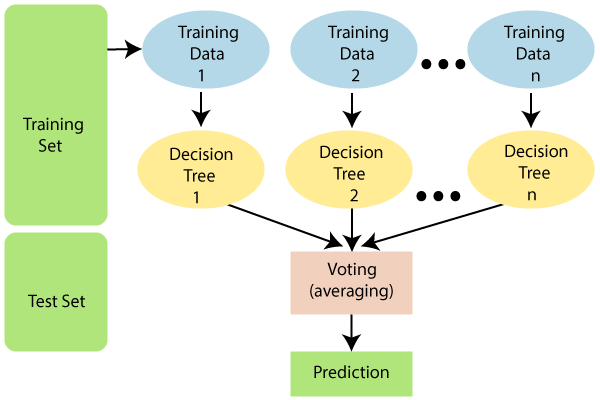

the voting mechanism aims to determine the best prediction by aggregating the individual predictions of multiple decision trees

example code for Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


adding Random Forest Classifier to predic heart disease

In [ ]:
from sklearn.tree import RandomForestClassifier
acc_Dtree=[]

kf=model_selection.StratifiedKFold(n_splits=5)d

for fold,(trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):
                                                                                                                                                                                    
    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]
    
    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]
    
    clf=RandomForestClassifier(n_estimators=200,criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    
    print(y_pred)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_Dtree.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    

ImportError: cannot import name 'RandomForestClassifier' from 'sklearn.tree' (C:\Users\vishn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\tree\__init__.py)